In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [82]:
data=pd.read_csv(r"C:\Users\MAHESH\seaborn-data\kidney_disease_mini project.csv")
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [83]:
data.shape

(400, 26)

In [84]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [86]:
##DATA PREPROCESSSING...

In [87]:
categorial_cols = [col for col in data.columns if data[col].dtype=="object"]
categorial_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [88]:
numerical_cols = [x for x in data.columns if not x in categorial_cols]
numerical_cols

['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [89]:
for i in ['rc','wc','pcv']:
    data[i] = data[i].str.extract('(\d+)').astype(float)

In [90]:
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    data[i].fillna(data[i].mean(),inplace=True)

In [91]:
rbc = pd.get_dummies(data[["rbc"]],drop_first=True)
rbc.head()

,rbc_normal
0,0
1,0
2,1
3,1
4,1


In [92]:
pc = pd.get_dummies(data[["pc"]],drop_first=True)
pc.head()

,pc_normal
0,1
1,1
2,1
3,0
4,1


In [93]:
pcc = pd.get_dummies(data[["pcc"]],drop_first=True)
pcc.head()

,pcc_present
0,0
1,0
2,0
3,1
4,0


In [94]:
ba = pd.get_dummies(data[["ba"]],drop_first=True)
ba.head()

,ba_present
0,0
1,0
2,0
3,0
4,0


In [95]:
data.drop(["rbc","pc","pcc","ba"],axis=1,inplace=True)


In [96]:
data.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,...,44.0,7800.0,5.000000,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,...,38.0,6000.0,4.241636,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,...,31.0,7500.0,4.241636,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,...,32.0,6700.0,3.000000,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,...,35.0,7300.0,4.000000,no,no,no,good,no,no,ckd


In [97]:
data = pd.concat([data,rbc,pc,pcc,ba],axis=1)

In [98]:
data.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,dm,cad,appet,pe,ane,classification,rbc_normal,pc_normal,pcc_present,ba_present
0,0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,...,yes,no,good,no,no,ckd,0,1,0,0
1,1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,...,no,no,good,no,no,ckd,0,1,0,0
2,2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,...,yes,no,poor,no,yes,ckd,1,1,0,0
3,3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,...,no,no,poor,yes,yes,ckd,1,0,1,0
4,4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,...,no,no,good,no,no,ckd,1,1,0,0


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   bgr             400 non-null    float64
 7   bu              400 non-null    float64
 8   sc              400 non-null    float64
 9   sod             400 non-null    float64
 10  pot             400 non-null    float64
 11  hemo            400 non-null    float64
 12  pcv             400 non-null    float64
 13  wc              400 non-null    float64
 14  rc              400 non-null    float64
 15  htn             398 non-null    object 
 16  dm              398 non-null    object 
 17  cad             398 non-null    obj

In [100]:
k=data["age"].apply(lambda x : int(x)//10).to_list()

In [101]:
a=[0]*10
for i in range(len(k)):
    a[k[i]]+=1
a

[10, 11, 23, 43, 71, 91, 96, 47, 7, 1]

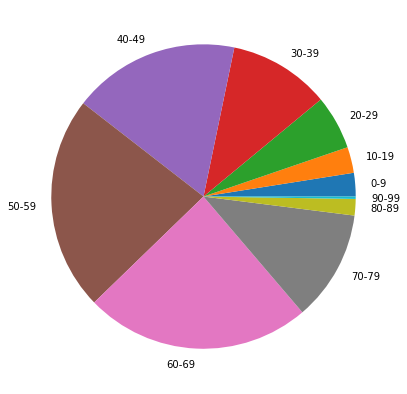

In [102]:
plt.figure(figsize= (7,7))
x_labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
y_labels = np.array(a)
plt.pie(y_labels, labels = x_labels)
plt.show() 

In [103]:
data["classification"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [104]:
data.replace({"notckd":0,"ckd":1,"ckd\t":1},inplace=True)

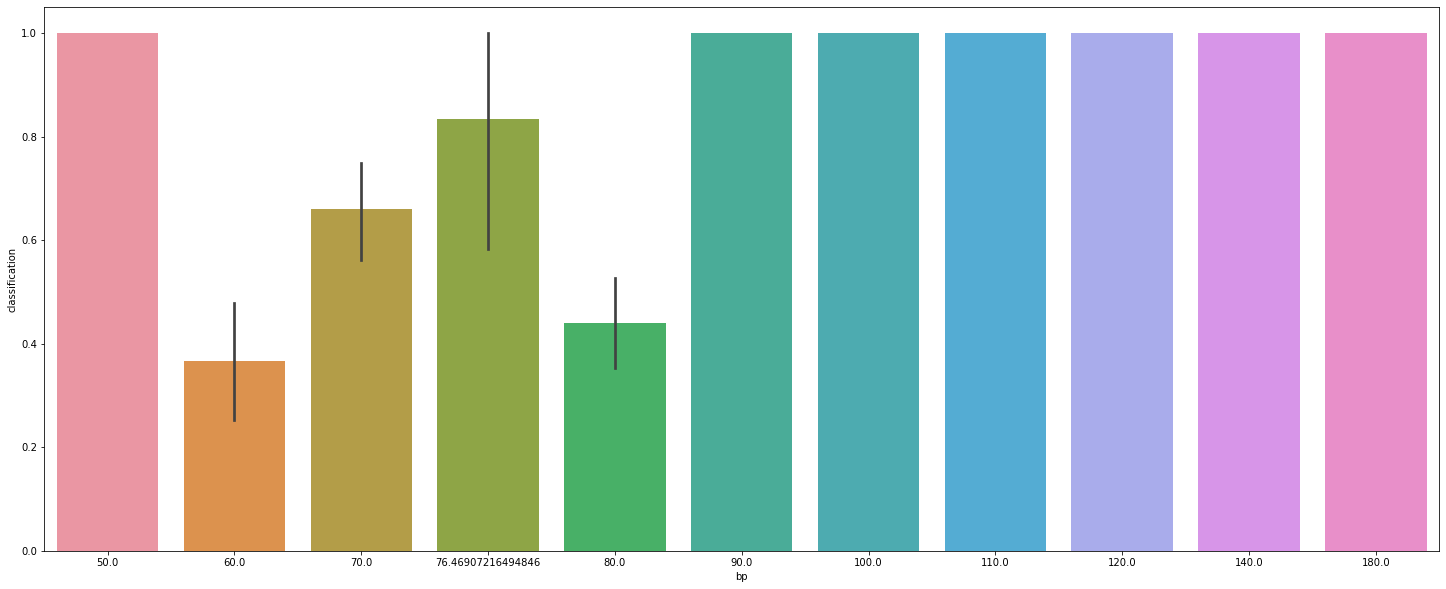

In [105]:
plt.figure(figsize=(25,10))
sns.barplot(x =data['bp'],y =data['classification'],data=data)
plt.show()


<AxesSubplot:xlabel='classification', ylabel='age'>

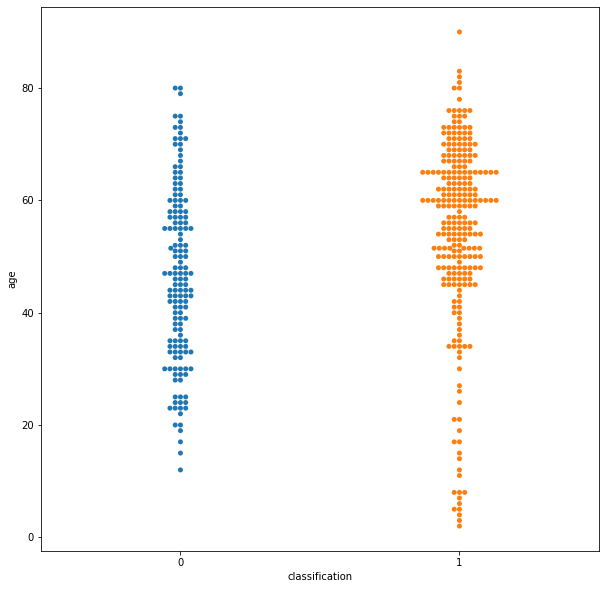

In [106]:
plt.figure(figsize=(10,10))
sns.swarmplot(y=data["age"], x = data["classification"])

In [107]:
data["appet"].value_counts()

good    317
poor     82
Name: appet, dtype: int64

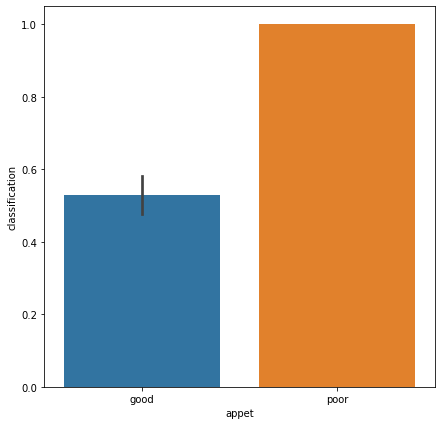

In [108]:
plt.figure(figsize=(7,7))
sns.barplot(x =data['appet'],y =data['classification'],data=data)
plt.show()

In [109]:
data.replace({"good":1,"poor":0},inplace=True)

In [110]:
data["ane"].value_counts()

no     339
yes     60
Name: ane, dtype: int64

In [111]:
data.replace({"no":0,"yes":1,"\tno":0,"\tyes":1," yes":1},inplace=True)

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   bgr             400 non-null    float64
 7   bu              400 non-null    float64
 8   sc              400 non-null    float64
 9   sod             400 non-null    float64
 10  pot             400 non-null    float64
 11  hemo            400 non-null    float64
 12  pcv             400 non-null    float64
 13  wc              400 non-null    float64
 14  rc              400 non-null    float64
 15  htn             398 non-null    float64
 16  dm              398 non-null    float64
 17  cad             398 non-null    flo

In [113]:
data=data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [114]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   bgr             400 non-null    float64
 7   bu              400 non-null    float64
 8   sc              400 non-null    float64
 9   sod             400 non-null    float64
 10  pot             400 non-null    float64
 11  hemo            400 non-null    float64
 12  pcv             400 non-null    float64
 13  wc              400 non-null    float64
 14  rc              400 non-null    float64
 15  htn             400 non-null    float64
 16  dm              400 non-null    float64
 17  cad             400 non-null    flo

In [115]:
#Splitting Train Data and Test Data

In [116]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification', 'rbc_normal', 'pc_normal', 'pcc_present',
       'ba_present'],
      dtype='object')

In [117]:
X = data.loc[:,['age', 'bp', 'rc','wc','appet','pc_normal','htn','hemo','bgr','dm','ane']]
y = data["classification"]

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)
X_train.head()

,age,bp,rc,wc,appet,pc_normal,htn,hemo,bgr,dm,ane
336,25.0,60.0,5.000000,9200.000000,1.0,1,0.0,15.2,119.000000,0.0,0.0
64,55.0,80.0,4.241636,8406.122449,1.0,1,0.0,9.8,146.000000,0.0,0.0
55,35.0,80.0,4.241636,8406.122449,1.0,1,0.0,9.5,148.036517,0.0,0.0
106,50.0,90.0,4.241636,6500.000000,1.0,0,1.0,6.0,89.000000,1.0,1.0
300,45.0,60.0,5.000000,9200.000000,1.0,1,0.0,15.0,114.000000,0.0,0.0


In [119]:
#applying Random Forest algorithm

In [120]:
#getting the predictions using the trained model
predictions = indo.predict(X_test)

NameError: name 'indo' is not defined

In [ ]:
print("The mean absolute error by using the RandomForest is",mean_absolute_error(y_test,predictions))

In [ ]:
print("the accuracy of the train data is ",model.score(X_train,y_train)*100)

In [ ]:
print("the accuracy of the test data is",model.score(X_test,y_test)*100)


In [ ]:
#USING SUPPORT VECTOR MACHINE

In [187]:
model2 = SVC(C=1.0, kernel='linear')
model2.fit(X_train,y_train)

SVC(kernel='linear')

In [188]:
print("the mean absolute error is",mean_absolute_error(y_test,model2.predict(X_test)))

the mean absolute error is 0.075


In [189]:
print("the accuracy of the train data is ",model2.score(X_train,y_train)*100)

the accuracy of the train data is  93.4375


In [190]:
print("the accuracy of the test data is",model2.score(X_test,y_test)*100)

the accuracy of the test data is 92.5


In [185]:
y_pred=model2.predict(X_test)

In [186]:
model2.predict(X_train)

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [174]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.65

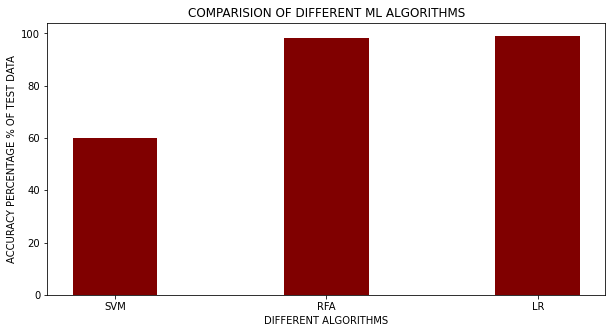

In [160]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'SVM':60.0, 'RFA':98.33, 'LR':99}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("DIFFERENT ALGORITHMS")
plt.ylabel("ACCURACY PERCENTAGE % OF TEST DATA")
plt.title("COMPARISION OF DIFFERENT ML ALGORITHMS")
plt.show()